In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

plt.style.use('ggplot')

In [124]:
df = pd.read_csv('train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,No,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1.0,Yes,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1.0,Yes,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1.0,Yes,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1.0,No,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [125]:
df.dtypes

Loan_ID               object
Gender               float64
Married               object
Dependents           float64
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [126]:
df.describe()

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,592.000000,614.000000,564.000000
mean,0.817590,0.744300,0.781759,0.133550,5403.459283,1621.245798,146.412162,342.410423,0.842199
std,0.386497,1.009623,0.413389,0.340446,6109.041673,2926.248369,85.587325,64.428629,0.364878
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,168.000000,360.000000,1.000000
max,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [127]:
df.shape

(614, 13)

In [128]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

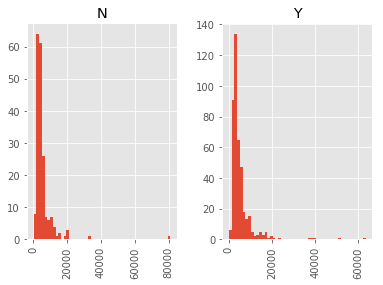

In [129]:
df[['Loan_Status', 'ApplicantIncome']].hist(bins=50, by='Loan_Status')
plt.show()

In [130]:
coapplicants = df['CoapplicantIncome']
coapplicants.head()

0       0.0
1    1508.0
2       0.0
3    2358.0
4       0.0
Name: CoapplicantIncome, dtype: float64

In [131]:
coapplicants = coapplicants.apply(lambda x:'N' if x==0 else 'Y')

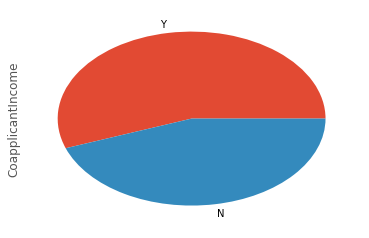

In [132]:
coapplicants.value_counts().plot(kind='pie')

In [133]:
df.drop('Loan_ID', axis=1, inplace=True)

In [134]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,No,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1.0,Yes,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1.0,Yes,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1.0,Yes,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1.0,No,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [135]:
df.columns = ['is_Male', 'is_Married', 'Dependents', 'is_Graduated', 'is_Self_Employed',
              'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 
              'has_Credit_History', 'Property_Area', 'Loan_Status']

In [136]:
df.head()

,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,has_Credit_History,Property_Area,Loan_Status
0,1.0,No,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1.0,Yes,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1.0,Yes,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1.0,Yes,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1.0,No,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [137]:
mapper = {'Yes':1, 'No':0}
df['is_Married'] = df['is_Married'].map(mapper)

In [138]:
mapper2 = {'Y':1, 'N':0}
df['Loan_Status'] = df['Loan_Status'].map(mapper2)

In [139]:
df.head()

,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,has_Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1


In [140]:
df.isnull().sum().sort_values(ascending=False)

has_Credit_History    50
LoanAmount            22
is_Married             3
Loan_Status            0
Property_Area          0
Loan_Amount_Term       0
CoapplicantIncome      0
ApplicantIncome        0
is_Self_Employed       0
is_Graduated           0
Dependents             0
is_Male                0
dtype: int64

In [141]:
df.dropna(subset=['is_Married'], inplace=True)

In [142]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [143]:
df['has_Credit_History'].value_counts()

1.0    472
0.0     89
Name: has_Credit_History, dtype: int64

In [144]:
df['has_Credit_History'].fillna(1, inplace=True)

In [145]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [146]:
df = pd.get_dummies(df, columns=['Property_Area'])

In [147]:
df.head()

,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,has_Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0.0,0.0,1,0.0,5849,0.0,146.369492,360.0,1.0,1,0,0,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,1,0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,1,0,0,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,1,0,0,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,1,0,0,1


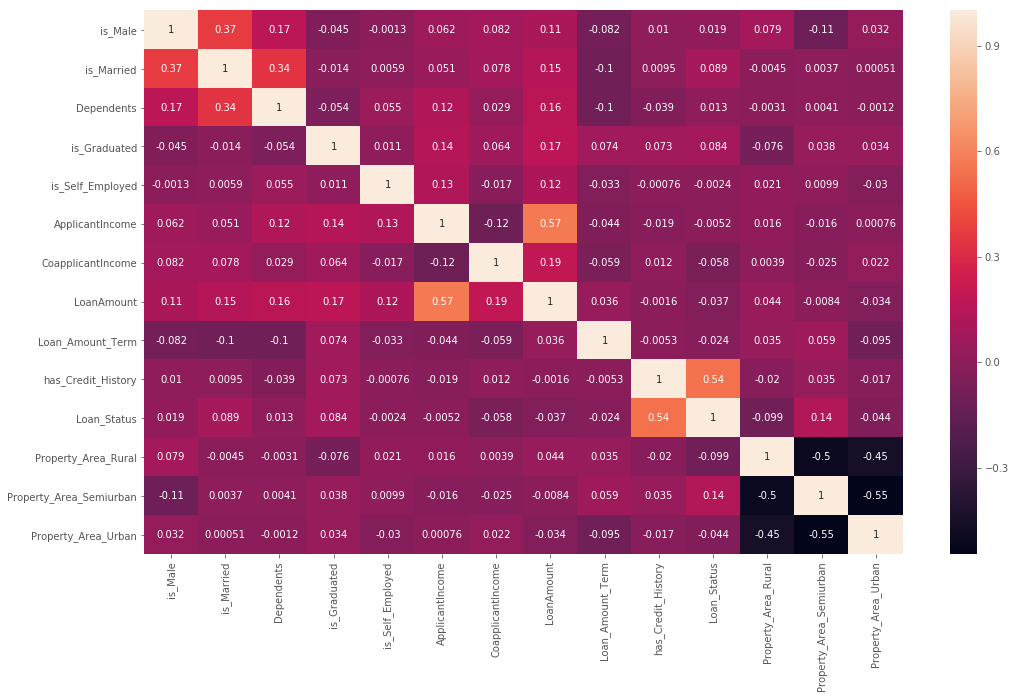

In [148]:
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [149]:
df['TotalInCome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [150]:
df.head()

,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,has_Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,TotalInCome
0,1.0,0.0,0.0,1,0.0,5849,0.0,146.369492,360.0,1.0,1,0,0,1,5849.0
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,1,0,0,6091.0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,1,0,0,1,3000.0
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,1,0,0,1,4941.0
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,1,0,0,1,6000.0


In [151]:
df['ApplicantIncome'] = np.log(df['ApplicantIncome'])
df['TotalInCome'] = np.log(df['TotalInCome'])
df.loc[df['CoapplicantIncome'] == 0, 'CoapplicantIncome'] = 1
df['CoapplicantIncome'] = np.log(df['CoapplicantIncome'])

In [152]:
df.head()

,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,has_Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,TotalInCome
0,1.0,0.0,0.0,1,0.0,8.674026,0.000000,146.369492,360.0,1.0,1,0,0,1,8.674026
1,1.0,1.0,1.0,1,0.0,8.430109,7.318540,128.000000,360.0,1.0,0,1,0,0,8.714568
2,1.0,1.0,0.0,1,1.0,8.006368,0.000000,66.000000,360.0,1.0,1,0,0,1,8.006368
3,1.0,1.0,0.0,0,0.0,7.856707,7.765569,120.000000,360.0,1.0,1,0,0,1,8.505323
4,1.0,0.0,0.0,1,0.0,8.699515,0.000000,141.000000,360.0,1.0,1,0,0,1,8.699515


In [153]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [155]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [157]:
print('Score no conjunto de treino: {0:.2%}'.format(lr.score(X_train, y_train)))
print('Score no conjunto de teste: {0:.2%}'.format(lr.score(X_test, y_test)))

Score no conjunto de treino: 80.44%
Score no conjunto de teste: 82.18%


In [164]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)

print('Score no conjunto de treino: {0:.2%}'.format(dt.score(X_train, y_train)))
print('Score no conjunto de teste: {0:.2%}'.format(dt.score(X_test, y_test)))

Score no conjunto de treino: 82.64%
Score no conjunto de teste: 83.17%


In [173]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

print('Score no conjunto de treino: {0:.2%}'.format(rf.score(X_train, y_train)))
print('Score no conjunto de teste: {0:.2%}'.format(rf.score(X_test, y_test)))

Score no conjunto de treino: 98.78%
Score no conjunto de teste: 75.25%


In [176]:
dt.predict([X_test.iloc[0]])

array([1], dtype=int64)

In [178]:
X_test['Loan_Status'] = dt.predict(X_test)

C:\Users\Martins\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [180]:
X_test.to_csv('clientes_previstos.csv', index=False)

In [182]:
import pickle
pickle.dump(dt, open('modelo.sav', 'wb'))

In [184]:
modelo = pickle.load(open('modelo.sav', 'rb'))

In [185]:
modelo

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')